In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
df=pd.read_csv("datasets\\BSEForDate.csv", names=['Date', 'Open', 'High', 'Low', 'Close'])
df.drop(df.index[0], inplace=True)
df['Date'] = df['Date'].astype('datetime64[ns]')
df["Open"] = df["Open"].astype("float")
df["Low"] = df["Low"].astype("float")
df["High"] = df["High"].astype("float")
df["Close"] = df["Close"].astype("float")
df.head()

,Date,Open,High,Low,Close
1,2010-01-04,17473.45,17582.84,17378.38,17558.73
2,2010-01-05,17555.77,17729.78,17555.77,17686.24
3,2010-01-06,17719.47,17790.33,17636.71,17701.13
4,2010-01-07,17701.97,17733.34,17566.54,17615.72
5,2010-01-08,17603.87,17658.12,17508.96,17540.29


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 1 to 2526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2526 non-null   datetime64[ns]
 1   Open    2526 non-null   float64       
 2   High    2526 non-null   float64       
 3   Low     2526 non-null   float64       
 4   Close   2526 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 118.4 KB


In [71]:
#data columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [72]:
#check for missing values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [75]:
#lets see if date is a date time series
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [74]:
#lets make Date as index
df.set_index("Date",inplace=True)

In [76]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06'],
              dtype='datetime64[ns]', name='Date', length=2526, freq=None)

In [77]:
df.head()

,Open,High,Low,Close
Date,,,,
2010-01-04,17473.45,17582.84,17378.38,17558.73
2010-01-05,17555.77,17729.78,17555.77,17686.24
2010-01-06,17719.47,17790.33,17636.71,17701.13
2010-01-07,17701.97,17733.34,17566.54,17615.72
2010-01-08,17603.87,17658.12,17508.96,17540.29


In [78]:
#lets see date for the month of January and february
df["2010-01":"2010-02"]

,Open,High,Low,Close
Date,,,,
2010-01-04,17473.45,17582.84,17378.38,17558.73
2010-01-05,17555.77,17729.78,17555.77,17686.24
2010-01-06,17719.47,17790.33,17636.71,17701.13
2010-01-07,17701.97,17733.34,17566.54,17615.72
2010-01-08,17603.87,17658.12,17508.96,17540.29
2010-01-11,17724.59,17776.57,17500.79,17526.71
2010-01-12,17534.10,17612.00,17392.55,17422.51
2010-01-13,17368.03,17528.31,17276.46,17509.80
2010-01-14,17525.71,17628.04,17525.71,17584.87


In [79]:
#lets see data of January only
df["2010-01"]

,Open,High,Low,Close
Date,,,,
2010-01-04,17473.45,17582.84,17378.38,17558.73
2010-01-05,17555.77,17729.78,17555.77,17686.24
2010-01-06,17719.47,17790.33,17636.71,17701.13
2010-01-07,17701.97,17733.34,17566.54,17615.72
2010-01-08,17603.87,17658.12,17508.96,17540.29
2010-01-11,17724.59,17776.57,17500.79,17526.71
2010-01-12,17534.10,17612.00,17392.55,17422.51
2010-01-13,17368.03,17528.31,17276.46,17509.80
2010-01-14,17525.71,17628.04,17525.71,17584.87


In [80]:
df.sort_index(inplace=True)
df_jan=df["2010-01"] #January data in sorted way

In [81]:
df_jan #january dataset created for see the trend in January

,Open,High,Low,Close
Date,,,,
2010-01-04,17473.45,17582.84,17378.38,17558.73
2010-01-05,17555.77,17729.78,17555.77,17686.24
2010-01-06,17719.47,17790.33,17636.71,17701.13
2010-01-07,17701.97,17733.34,17566.54,17615.72
2010-01-08,17603.87,17658.12,17508.96,17540.29
2010-01-11,17724.59,17776.57,17500.79,17526.71
2010-01-12,17534.10,17612.00,17392.55,17422.51
2010-01-13,17368.03,17528.31,17276.46,17509.80
2010-01-14,17525.71,17628.04,17525.71,17584.87


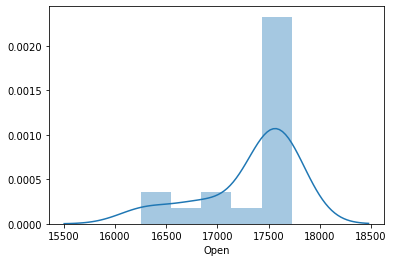

In [82]:
sns.distplot(df_jan["Open"])

In [83]:
#resmapling data on a monthly frequency with avg close price every month end
df.Close.resample("M").mean()

Date
2010-01-31    17260.413684
2010-02-28    16183.805000
2010-03-31    17302.716190
2010-04-30    17678.640000
2010-05-31    16844.535238
                  ...     
2019-11-30    40513.094500
2019-12-31    41054.449048
2020-01-31    41360.947826
2020-02-29    40674.324000
2020-03-31    38244.886000
Freq: M, Name: Close, Length: 123, dtype: float64

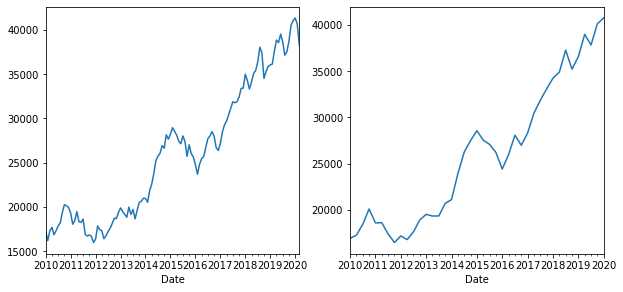

In [84]:
#plotting the above data to see the trend
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
df.Close.resample("M").mean().plot()
plt.subplot(2,2,2)
#lets plot data quarterly
df.Close.resample("Q").mean().plot()

Text(0, 0.5, 'close Price')

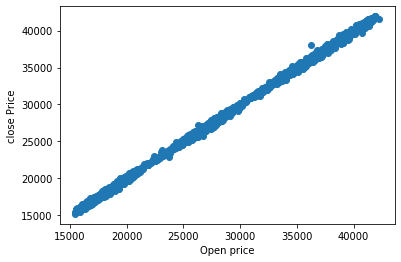

In [91]:
plt.scatter(df["Open"].values,df["Close"].values)
plt.xlabel("Open price")
plt.ylabel("close Price")

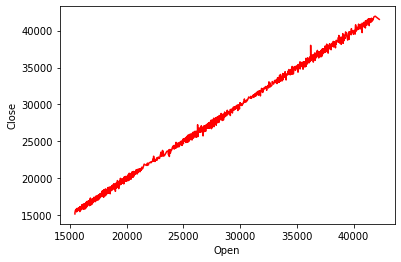

In [92]:
sns.lineplot(df["Open"],df["Close"],data=df,color="r")

Lets look at the datato predict the close point of the same 

In [93]:
df.head()

,Open,High,Low,Close
Date,,,,
2010-01-04,17473.45,17582.84,17378.38,17558.73
2010-01-05,17555.77,17729.78,17555.77,17686.24
2010-01-06,17719.47,17790.33,17636.71,17701.13
2010-01-07,17701.97,17733.34,17566.54,17615.72
2010-01-08,17603.87,17658.12,17508.96,17540.29


In [97]:
#feature correlation
df1=df[["Open","High","Low"]]
df1.corr()

,Open,High,Low
Open,1.000000,0.999861,0.999790
High,0.999861,1.000000,0.999793
Low,0.999790,0.999793,1.000000


In [119]:
#Data is highly correlated hence it will give us a bad model so use only 1 feature
X=df.drop(["Close", "High"], axis=1).values

In [118]:
X

,Open,Low
Date,,
2010-01-04,17473.45,17378.38
2010-01-05,17555.77,17555.77
2010-01-06,17719.47,17636.71
2010-01-07,17701.97,17566.54
2010-01-08,17603.87,17508.96
...,...,...
2020-03-02,38910.95,37785.99
2020-03-03,38480.89,38142.30
2020-03-04,38715.72,37846.10


In [120]:
#Label
y=df["High"]
y.shape

(2526,)

In [121]:
#train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
#lets  do the feature scaling for an acurate model
#from sklearn.preprocessing import MinMaxScaler
#mm=MinMaxScaler()
#mm.fit(X_train,y_train)

In [122]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression(normalize=True)
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [123]:
y_pred=lreg.predict(X_test)
y_pred[:10]

array([17705.55123088, 20954.06381408, 19028.55198277, 18841.85412373,
       17436.69767089, 27690.12338292, 18790.36785834, 16853.04303284,
       33807.73739626, 18785.70741264])

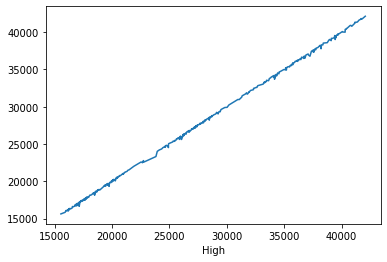

In [124]:
sns.lineplot(y_test,y_pred)

In [125]:
lreg.score(X_test,y_test)  

0.9998154116308342

In [126]:
lreg.score(X_train,y_train)

0.9997566720964303

In [127]:
X = df.drop(["Close", "Low"], axis=1).values
y1=df["Low"]

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y1_train,y1_test= train_test_split(X,y1,test_size=0.2,random_state=1)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y1_train)

y1_pred=model.predict(X_test)
y1_pred

model.score(X_test,y1_test)  


0.9997158076552554

In [130]:
import joblib
joblib.dump(model, './app/app/models/low.pkl') 
  
from sklearn.externals import joblib 
joblib.dump(lreg, './app/app/models/high.pkl') 

['./app/app/models/high.pkl']

In [52]:
import pickle 
saved_model = pickle.dumps(model) 
lreg_from_pickle = pickle.loads(saved_model) 